# Lending Club Case Study

## **1. Introduction**



### **1.1. Objective**
Analyse the given data set of a leading lending company, identify the risks and issues with the applicant's borrowing pattern. Prepare a detailed case study document highlighting the risks involved and provide my observation and recommendations.

### **1.2. Problem Statement**
- Make a decision on a loan application when it's received based on the risk factors
- Should not reject an application if the applicant has the potential to repay the loan
- Should not approve an application if the applicant could possibly default

## **2. Data Understanding**



### **2.1. Import necessary libraries**


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas by default doesn't display all the columns in the dataframe
# As we're going to work on a large dataset, the following setting will help read data from all the columns
pd.set_option('display.max_columns', None)

# Disable scientific notation
pd.options.display.float_format = '{:,.2f}'.format

# For some of the columns we may have to see the data from all rows
# Eg: Categorical columns.
pd.set_option('display.max_rows', None)

# Set themes, styles and color palette for seaborn charts
sns.set_theme(style='darkgrid', context='poster')
sns.set_palette(palette='pastel', n_colors=10)

plt.rcParams["figure.figsize"] = (12, 4)
plt.rcParams["axes.titlesize"] = 14 
plt.rcParams["axes.labelsize"] = 12 
plt.rcParams["xtick.labelsize"] = 10 
plt.rcParams["ytick.labelsize"] = 10 

### **2.2. Data Overview**

In [54]:
# Load the data from loan.csv file. 
# Using the read_csv function from the pandas library, we can load the data from the csv to a pandas dataframe.
df = pd.read_csv('Data/loan.csv', low_memory=False)

# Shape property of the pandas dataframe returns the dimention of the dataframe
# The return value will contain the number of rows and columns in the dataframe
df.shape

# Quick observation
#-------------------
# 1. There are 39717 rows and
# 2. There are 111 columns
#-------------------

(39717, 111)

In [55]:
df.dtypes

# Looking into the dtypes property of the dataframe, help us understand the data type of each column
#
# Quick observation
#-------------------
# 1. Most of the columns are of type object.
# 2. `issue_d` looks like a date column. Also other columns with `_d` suffix.
# 3. `grade`, `sub_grade`, `term`, `loan_status`, `verification_status` etc. looks like category columns
# 4. Columns like `id`, `member_id`, `url`, `desc` may not be useful for analysing the risk. Hence can be removed.
#-------------------

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [56]:
# Pandas dataframe object offers `nunique` function which give the number of unique elements in each column
df.nunique().sort_values(ascending=False)

# Quick observation
#-------------------
# 1. Some columns have unique values equal to the number of columns (39717)
# 2. Some columns have 0 unique values! Must be all empty
# 3. Both such columns are not going to help us with data analysis
# 4. Columns `loan_amnt`, `funded_amnt` and `funded_amnt_inv` says the borrower applied for an amount, but the institution decided to fund either more or less.
#    For our analysis we only need the amount the borrower applied for. Hence the investor related columns can be removed before we proceed furthen.
# 5. While `addr_state` has 50 unique values, the `zip_code` only has 823 unique values (Proportionally less). There's something going on with `zip_code`.
#-------------------

id                                39717
url                               39717
member_id                         39717
total_pymnt                       37850
total_pymnt_inv                   37518
total_rec_int                     35148
last_pymnt_amnt                   34930
emp_title                         28820
desc                              26526
revol_bal                         21711
title                             19615
installment                       15383
funded_amnt_inv                    8205
total_rec_prncp                    7976
annual_inc                         5318
recoveries                         4040
dti                                2868
collection_recovery_fee            2616
total_rec_late_fee                 1356
out_prncp_inv                      1138
out_prncp                          1137
revol_util                         1089
funded_amnt                        1041
loan_amnt                           885
zip_code                            823


In [57]:
# Get the columns in the decending order of most number of null values 
print(df.isnull().sum().sort_values(ascending=False))

# Quick observation
#-------------------
# 1. Some columns have null or empty values equal to the number of columns (39717)
# 2. Such columns are not going to help us with data analysis
#-------------------

verification_status_joint         39717
annual_inc_joint                  39717
mo_sin_old_rev_tl_op              39717
mo_sin_old_il_acct                39717
bc_util                           39717
bc_open_to_buy                    39717
avg_cur_bal                       39717
acc_open_past_24mths              39717
inq_last_12m                      39717
total_cu_tl                       39717
inq_fi                            39717
total_rev_hi_lim                  39717
all_util                          39717
max_bal_bc                        39717
open_rv_24m                       39717
open_rv_12m                       39717
il_util                           39717
total_bal_il                      39717
mths_since_rcnt_il                39717
open_il_24m                       39717
open_il_12m                       39717
open_il_6m                        39717
open_acc_6m                       39717
tot_cur_bal                       39717
tot_coll_amt                      39717


In [58]:
# Get those column which has null values accross the series
print(df.columns[df.isnull().all()])

# Let us find out how many columns has null values in all the rows.
print(f"Number of columns with null values in all the rows: {df.columns[df.isnull().all()].size}")

# Quick observation
#-------------------
# 1. We have 54 columns which has null values in all the rows
# 2. We can safely remove them
#-------------------

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [59]:
# Get those column which has null values is some rows but not all
print(df.columns[~df.isnull().all() & df.isnull().any()])

someButNotAllNulls = df.columns[~df.isnull().all() & df.isnull().any()]

for col in someButNotAllNulls:
    if ((df[col].value_counts().size < 15) & (df[col].value_counts().size > 1)):
        print(df[col].value_counts().head(2))

for col in someButNotAllNulls:
    if (df[col].value_counts().size == 1):
        print(f"Column can be deleted: {df[col].name}")
        
# Quick observation - columns which has some value and not all nulls
#--------------------------------------------------------------------
# 1. The columns which has one unique value [`collections_12_mths_ex_med`, `chargeoff_within_12_mths`, `tax_liens`]
# 2. The above listed columns can safely be deleted
# 3. The column `next_pymnt_d` doesn't have enough information for analysis and hence can be deleted.
#--------------------------------------------------------------------

Index(['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')
emp_length
10+ years    8879
< 1 year     4583
Name: count, dtype: int64
next_pymnt_d
Jun-16    1125
Jul-16      15
Name: count, dtype: int64
pub_rec_bankruptcies
0.00    37339
1.00     1674
Name: count, dtype: int64
Column can be deleted: collections_12_mths_ex_med
Column can be deleted: chargeoff_within_12_mths
Column can be deleted: tax_liens


In [60]:
# Get those column which has no null values
print(df.columns[~df.isnull().any()])

noNulls = df.columns[~df.isnull().any()]

for col in noNulls:
    if ((df[col].value_counts().size < 15) & (df[col].value_counts().size > 1)):
        print(df[col].value_counts().head(2))

for col in noNulls:
    if (df[col].value_counts().size == 1):
        print(f"Column can be deleted: {df[col].name}")
        
# Quick observation - columns with no null values
#-------------------------------------------------
# 1. The columns which has one unique value [pymnt_plan, initial_list_status, policy_code, application_type, acc_now_delinq, delinq_amnt]
# 2. The above listed columns can safely be deleted
#-------------------------------------------------

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code',
       'application_type', 'acc_now_delinq', 'delinq_amnt'],
      dtype='object')
term
36 months    29096
60 months    10621
Name: count, dtype: int64
grade
B    12020
A    10085
Name: count, dtype: int64
home_ownership
RENT        18899
MORTGAGE    17659
Name: count, dtype: int64
verification_status
Not Verified    16921
Verified        12809

## **3. Data Preparation**



### **3.1. Data Cleaning**
- Remove columns


In [61]:
columnsToRemove_Iteration1 = ['id', 'member_id', 'url', 'desc', 'total_pymnt_inv', 'funded_amnt_inv', 'out_prncp_inv', 'funded_amnt', 'zip_code',
                    # Columns with null values
                    'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
                    'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
                    'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
                    'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
                    'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
                    'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
                    'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
                    'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
                    'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
                    'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
                    'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
                    'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
                    'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
                    'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
                    'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim',
                    'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit',
                    # The columns which has one unique value
                    'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens',
                    'pymnt_plan', 'initial_list_status', 'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt',
                    # Columns with not enough info
                    'next_pymnt_d']

# Pandas data frame's loc function can be used to slice the data by rows and columns
# In this case we know the list of columns which we do not want.
# Hence using the `~` character to let the loc function know we want all but these columns from the data frame.
df = df.loc[:, ~df.columns.isin(columnsToRemove_Iteration1)]

df.shape

# Quick observation
#-------------------
# 1. After removing the columns which are observed as not necessary for analysis, we're left with 38 columns.
#-------------------

(39717, 38)

- Handle missing / null values


In [62]:
# Using the isnull and sum function combination on the data frame gets the number of null values in each columns
# Sorting them by descending order gives the column with most null values on top and so on
df.isnull().sum().sort_values(ascending=False)

# Quick observation
#-------------------
# 1. After removing the columns which are observed as not necessary for analysis, we're left with 38 columns.
# 2. There are 9 / 38 columns which has null values. 
# 3. Columns `mths_since_last_record` and `mths_since_last_delinq` has way too many null values.
# 4. These columns can safely be removed
#-------------------

mths_since_last_record     36931
mths_since_last_delinq     25682
emp_title                   2459
emp_length                  1075
pub_rec_bankruptcies         697
last_pymnt_d                  71
revol_util                    50
title                         11
last_credit_pull_d             2
collection_recovery_fee        0
last_pymnt_amnt                0
recoveries                     0
total_rec_late_fee             0
total_rec_prncp                0
total_pymnt                    0
out_prncp                      0
total_acc                      0
revol_bal                      0
pub_rec                        0
open_acc                       0
total_rec_int                  0
loan_amnt                      0
term                           0
earliest_cr_line               0
delinq_2yrs                    0
dti                            0
addr_state                     0
purpose                        0
loan_status                    0
issue_d                        0
verificati

In [63]:
# Get the percentage of null values on each column. 
columns_null_percentage = ((df.isnull().sum() / df.shape[0]) * 100).round(2).sort_values(ascending=False)

# Get only those columns which has less than 50% of null values
# Using the loc property of the data frame to get all rows and those columns which has less than 50% null values
df = df.loc[:, columns_null_percentage < 50]

df.shape

# Quick observation
#-------------------
# 1. After removing the columns which has more than 50% null values 
#-------------------

(39717, 36)

In [64]:
# emp_title                   2459 - Remove
# emp_length                  1075 - Column Needed - convert to type category
# pub_rec_bankruptcies         697 - Column Needed
# last_pymnt_d                  71 - Removed
# revol_util                    50 - Column Needed. But let go of the records with null values in revol_util
# title                         11 - Let us keep this column and figure out what to do later
# last_credit_pull_d             2 - Column Needed. But let of of the records with null values in last_credit_pull_d

columnsToRemove_iteration2 = ['emp_title', 'last_pymnt_d']
df = df.loc[:, ~df.columns.isin(columnsToRemove_iteration2)]

df.shape

# Quick observation
#-------------------
# 1. After removing the columns we're left with 34 columns
#-------------------

(39717, 34)

In [65]:
# There aer 1075 null values in the emp_length column.
# Looking into the value counts of the emp_length column, it can very well be used as a categorical variable.
# Let us analyse why we have empty values and what can we fill it with.

# Though the emp_length is empty, the applicant has got credit lines
# The applicant may not be an employee but a business owner or freelancer

# Creating derived columns from the date column
df['d_earliest_cr_line_month'] = df['earliest_cr_line'].str[:3].astype('category')
df['d_earliest_cr_line_year'] = df['earliest_cr_line'].str[-2:].astype('int')

# As the year only has last two digits of the year value, applying a lambda function to transform the year.
df['d_earliest_cr_line_year'] = df['d_earliest_cr_line_year'].apply(lambda x: 2000 + x if x <= 24 else 1900 + x).astype('category')

df[['d_earliest_cr_line_month', 'd_earliest_cr_line_year']].head(2)

# Quick observation
#-------------------
# 1. Now we have earliest credit line month and year.
#-------------------

,d_earliest_cr_line_month,d_earliest_cr_line_year
0,Jan,1985
1,Apr,1999


In [66]:
# Get the earliest credit line year for those applicants whose employment length is null
# Sort them by descending year to get the latest year in which credit line has been offered
df[df['emp_length'].isnull()]['d_earliest_cr_line_year'].value_counts().sort_index(ascending=False).head(1)

# Quick observation
#-------------------
# 1. 2008 is the latest year in which credit line has been offered to applicants who has empty values in emp_length column
# 2. We can safely replace the empty values with 10+ years category in emp_length columns
#-------------------

d_earliest_cr_line_year
2008    8
Name: count, dtype: int64

In [67]:
# Using the fillna funciton in pandas dataframe to replace null values with '10+ years'
df['emp_length'] = df['emp_length'].fillna(value='10+ years')

In [68]:
# The next column in focus is `pub_rec_bankruptcies` with 697 null values
# In this case we can safely replace the null values with 0
# Used the mode function here to do the action. 
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(value=df['pub_rec_bankruptcies'].mode())

In [69]:
# Column revol_util has 50 null values
# There's no pattern here. Hence we will remove the 50 records with null values
null_revol_util = df['revol_util'].isnull()
df = df.drop(df[null_revol_util].index).reset_index(drop=True)

# Column last_credit_pull_d only has 2 null values and we'll remove the records and reset the index.
# Using the drop parameter will remove the existing index ont he column
null_last_credit_pull_d = df['last_credit_pull_d'].isnull()
df = df.drop(df[null_last_credit_pull_d].index).reset_index(drop=True)

df.shape

(39665, 36)

- Remove duplicates


In [70]:
# We observed in the previous steps that the column `title` has duplicate data
df['title'].value_counts()

# Quick observation
#-------------------
# 1. We may have to create a derived column to consolidate the titles
# 2. Eg: If the title contains the word '*consolid*', it can be categorized as 'Consolidation'
#        If the title contains the word '*home*', it can be categorized as 'Home Improvement'
#        If the title contains the word '*credit*', it can be categorized as 'Crdit Card' etc.
# 3. Or we can drop the column from our analysis.
#-------------------

title
Debt Consolidation                                                                  2182
Debt Consolidation Loan                                                             1728
Personal Loan                                                                        659
Consolidation                                                                        516
debt consolidation                                                                   505
Credit Card Consolidation                                                            356
Home Improvement                                                                     356
Debt consolidation                                                                   334
Small Business Loan                                                                  328
Credit Card Loan                                                                     317
Personal                                                                             308
Consolidation L

- Calculate IQR and remove outliers


In [71]:
# What are the columns which may disturb our analysis result with extreme values?
# Numeric columns loan_amnt and annual_inc has some extreme values
df[['loan_amnt', 'annual_inc']].describe().round(2)

# Quick observation
#-------------------
# 1. The max values in both the columns are way above the 75th percentile.
#-------------------

,loan_amnt,annual_inc
count,"39,665.00","39,665.00"
mean,"11,228.08","68,997.56"
std,"7,456.56","63,790.42"
min,500.00,"4,000.00"
25%,"5,500.00","40,514.64"
50%,"10,000.00","59,000.00"
75%,"15,000.00","82,400.00"
max,"35,000.00","6,000,000.00"


<Axes: xlabel='loan_amnt'>

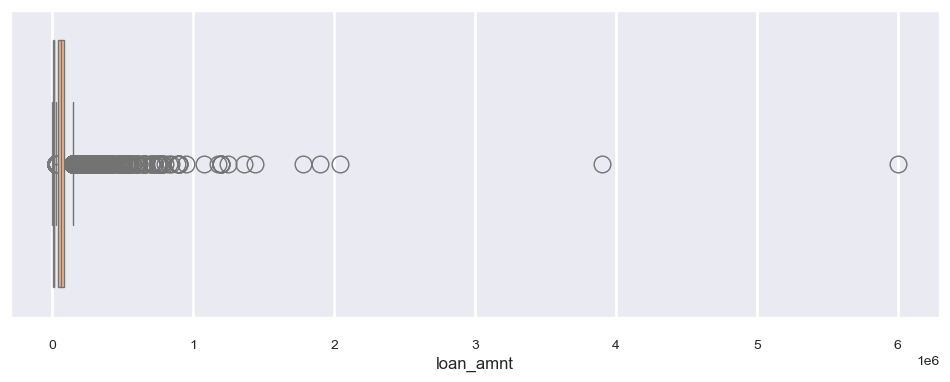

In [72]:
# Plot a box chart using Seaborn to see the outliers
sns.boxplot(data=df, x='loan_amnt')
sns.boxplot(data=df, x='annual_inc')

# Quick observation
#-------------------
# 1. The chart is unreadable because of outliers. Let us remove hte outliers and plot the chart again.
#-------------------

In [73]:
# Function takes the column name as input parameter
# FUnction returns number of records marked as outliers, lower bound, upper bound, q1 and q3

# Calculate the 25th and 75th quantiles
# IQR (Inter Quantile Range) = Q3 (75th Quantile) - Q1 (25th Quantile)
# Lowerbound is Q1 - (1.5 times of the IQR) - 1.5 is the number which I've taken for my calcuation.
# Upperbound is Q3 + (1.5 times of the IQR)
# Any value which is not between the lower and upper bounds are considered as outliers
def getOutliers(col_name):
    const_range_modifier = 1.5
    
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    IQR = q3 - q1

    lower_bound = q1 - (const_range_modifier * IQR)
    upper_bound = q3 + (const_range_modifier * IQR)

    outliers = df[(df[col_name] < lower_bound) | (df[col_name] > upper_bound)]

    return len(outliers), lower_bound, upper_bound, q1, q3

In [74]:
loan_amnt_outliers_len, loan_amnt_lb, loan_amnt_up, laq1, laq3 = getOutliers('loan_amnt')
annual_inc_outliers_len, annual_inc_lb, annual_inc_up, aiq1, aiq3 = getOutliers('annual_inc')

print("Loan Amount: ", loan_amnt_outliers_len, "records are outliers, which is ", f"{round((loan_amnt_outliers_len / df.shape[0])*100)}%")
print("Annual Income: ", annual_inc_outliers_len, "records are outliers, which is ", f"{round((annual_inc_outliers_len / df.shape[0])*100)}%")

# Quick observation
#-------------------
# 1. There are 3% outliers in `loan_amnt` column
# 2. There are 5% outliers in `annual_inc` column
#-------------------

Loan Amount:  1230 records are outliers, which is  3%
Annual Income:  1842 records are outliers, which is  5%


In [75]:
# Note: If there are more such column, we can write a function and reuse for removing the outliers.
# Slicing those records which are between lower and upper bound.
# This action will disturb the index against the rows
# Hence we're dropping the existing index while resetting the index.

# Removing the outliers from loan amount column
df = df[(df['loan_amnt'] >= loan_amnt_lb) & (df['loan_amnt'] <= loan_amnt_up)].reset_index(drop=True)

# Removing the outliers from annual income column
df = df[(df['annual_inc'] >= annual_inc_lb) & (df['annual_inc'] <= annual_inc_up)].reset_index(drop=True)

df.shape

(36881, 36)

<Axes: xlabel='loan_amnt'>

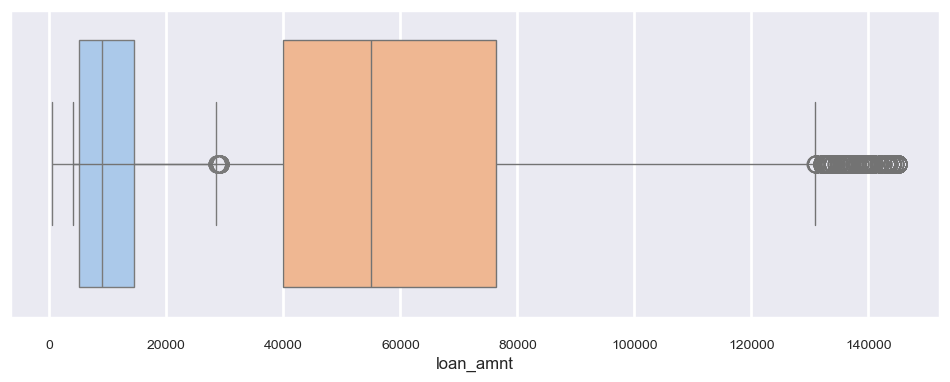

In [76]:
sns.boxplot(data=df, x='loan_amnt')
sns.boxplot(data=df, x='annual_inc')

# Quick observation
#-------------------
# 1. Now the chart is more readable.
#-------------------

### **3.2. Data Engineering**


- Create derived columns


In [77]:
# Revolving credit utilization and interest rates are in percentage.
# The columns are stored as string value types becasue of the % symbol. 
# Removing the % symbol and converting it to float types, can make the column a numeric column and we can use it for our analysis.
df['revol_util'] = df['revol_util'].str.rstrip('%').astype('float')
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float')

df['d_term'] = df['term'].str.rstrip(' months').astype('int')

In [78]:
# We already have created a couple of derived columns
# These columns ['d_earliest_cr_line_month', 'd_earliest_cr_line_year'] are derived from 'earliest_cr_line' date column
# There are a few more date columns. We can derive, month, quarter and year from those columns
# Date columns - ['issue_d', 'last_credit_pull_d']
#
# We can create few more derived columns like
#   - ['High Income', 'Middle Class', 'Low Income'] based on 'annual_inc' column
#   - ['Excellent', 'Good', 'Average', 'Poor', 'Critical'] based on 'revol_util' column. Higher the value in revolving credit utilization, lower the health.
#   - ['Too many', 'Many', 'Moderate', 'Few', 'Very few'] based on 'open_acc' column. More number of open credit lines higher the risk.

# Creating derived columns from the date column - issue_d
df['d_issue_d_month'] = df['issue_d'].str[:3].astype('category')
df['d_issue_d_year'] = df['issue_d'].str[-2:].astype('int')

# Creating derived columns from the date column - last_credit_pull_d
df['d_last_credit_pull_d_month'] = df['last_credit_pull_d'].str[:3].astype('category')
df['d_last_credit_pull_d_year'] = df['last_credit_pull_d'].str[-2:].astype('int')

# As the year only has last two digits of the year value, applying a lambda function to transform the year.
df['d_issue_d_year'] = df['d_issue_d_year'].apply(lambda x: 2000 + x if x <= 24 else 1900 + x)
df['d_last_credit_pull_d_year'] = df['d_last_credit_pull_d_year'].apply(lambda x: 2000 + x if x <= 24 else 1900 + x)

# The following are the dictionary variables for each of the potential derived columns
annual_inc_categories = {
    '3. High Income' : aiq3, 
    '2. Middle Class' : aiq1, 
    '1. Low Income' : 0
    }

revol_util_outliers_len, revol_util_lb, revol_util_up, ruq1, ruq3 = getOutliers('revol_util')
revol_util_categories = {
    '5. Excellent' : revol_util_up, 
    '4. Good' : ruq3, 
    '3. Average' : ruq1, 
    '2. Poor' : revol_util_lb, 
    '1. Critical' : 0
    }

open_acc_outliers_len, open_acc_lb, open_acc_up, oaq1, oaq3 = getOutliers('open_acc')
open_acc_categories = {
    '5. Very few' : open_acc_up, 
    '4. Few' : oaq3, 
    '3. Moderate' : oaq1, 
    '2. Many' : open_acc_lb, 
    '1. Too many' : 0
    }

# The funciton will take two input parameters
# The numeric column value and the associated dictionary object
# Based on the numeric threshold, the category is determined
def categorize(value: float, dictionary: dict):
    for category, threshold in dictionary.items():
        if value > threshold:
            return category
    return None 

# Creating derived columns by applying hte categorize function
df['d_annual_inc_categories'] = df['annual_inc'].apply(lambda x: categorize(x, annual_inc_categories))
df['d_revol_util_categories'] = df['revol_util'].apply(lambda x: categorize(x, revol_util_categories))
df['d_open_acc_categories'] = df['open_acc'].apply(lambda x: categorize(x, open_acc_categories))

df['d_derogatory'] = df['pub_rec'].apply(lambda x: 'Yes' if x > 0 else 'No').astype('category')
df['d_bankruptcy'] = df['pub_rec_bankruptcies'].apply(lambda x: 'Yes' if x > 0 else 'No').astype('category')
df['d_delinquency2y'] = df['delinq_2yrs'].apply(lambda x: 'More than once' if x > 1 else 'Zero or once').astype('category')
df['d_inquiry6m'] = df['inq_last_6mths'].apply(lambda x: 'More than once' if x > 1 else 'Zero or once').astype('category')


- Convert data types

In [79]:
# Convert the columns with values which can be grouped to category type
df[['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 
    'd_annual_inc_categories', 'd_revol_util_categories', 'd_open_acc_categories']] = \
df[['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 
    'd_annual_inc_categories', 'd_revol_util_categories', 'd_open_acc_categories']].astype('category')

In [80]:
# df.select_dtypes('object').info()
# df.select_dtypes('number').info()
# df.select_dtypes('category').info()

## **4. Exploratory Data Analysis (EDA)**



### **4.1. Univariate Analysis**



In [82]:
def univariate_analysis(chart_type, analysis_type, data, x_column, x_label, showKde=True, noOfbins=50):
    if (chart_type == 'hist'):
        sns.histplot(data=data, x=x_column, kde=showKde, bins=noOfbins)
    else:
        sns.boxplot(data=data, x=x_column) 
        
    plt.title(f"Univariate Analysis ({analysis_type})")
    plt.xlabel(x_label)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()  

Univariate analysis is the type of analysis where we analyze a pattern based on single variable. We have both numeric and categoric variables in the data frame. Let us plot graphs and charts using matplotlib and seaborn libraries.

#### **4.1.1. Numeric Variables**


In [ ]:
df.select_dtypes('number').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36881 entries, 0 to 36880
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_amnt                  36881 non-null  int64  
 1   int_rate                   36881 non-null  float64
 2   installment                36881 non-null  float64
 3   annual_inc                 36881 non-null  float64
 4   dti                        36881 non-null  float64
 5   revol_util                 36881 non-null  float64
 6   d_term                     36881 non-null  int32  
 7   d_issue_d_year             36881 non-null  int64  
 8   d_last_credit_pull_d_year  36881 non-null  int64  
dtypes: float64(5), int32(1), int64(3)
memory usage: 2.4 MB


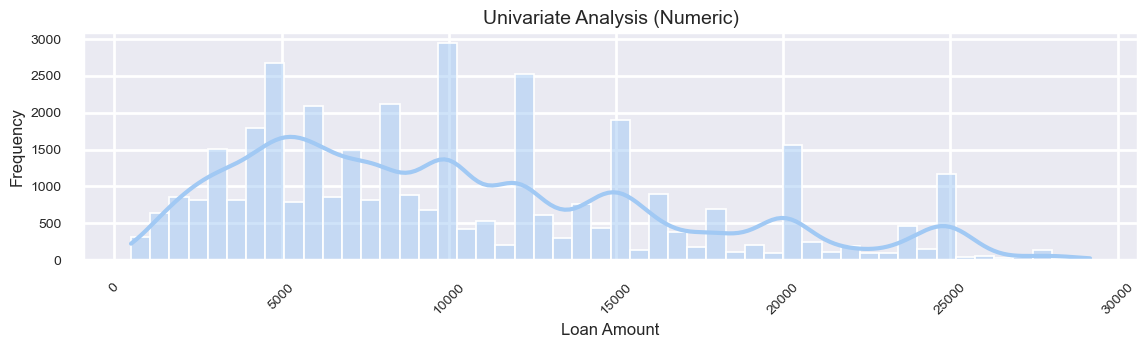

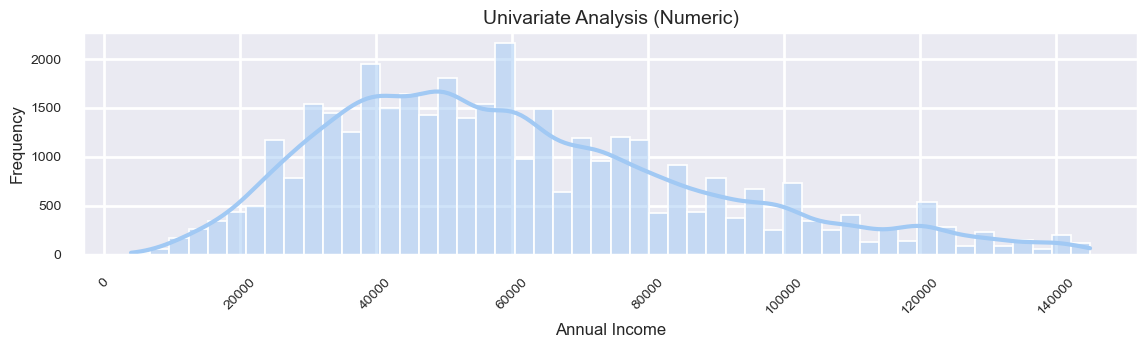

In [84]:
univariate_analysis('hist', 'Numeric', df, 'loan_amnt', 'Loan Amount')
univariate_analysis('hist', 'Numeric', df, 'annual_inc', 'Annual Income')

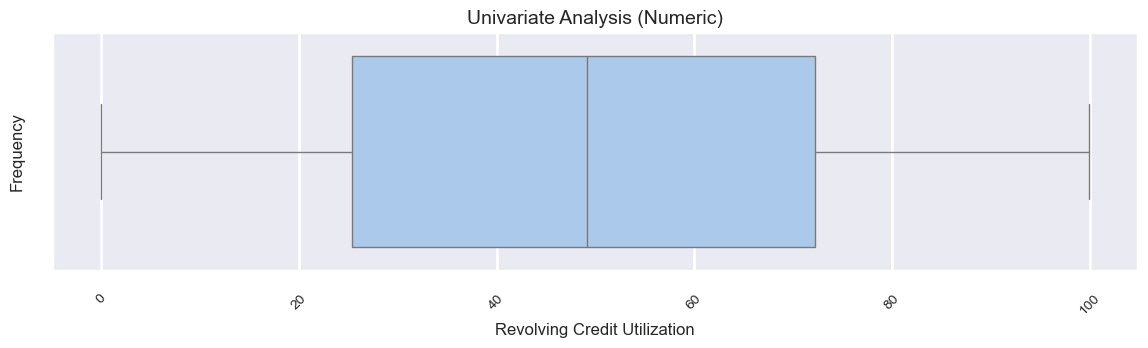

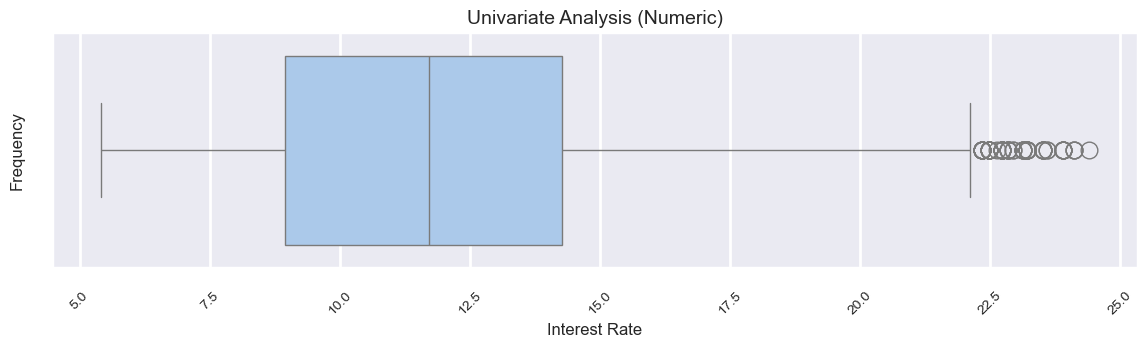

In [85]:
univariate_analysis('box', 'Numeric', df, 'revol_util', 'Revolving Credit Utilization')
univariate_analysis('box', 'Numeric', df, 'int_rate', 'Interest Rate')

#### **4.1.2. Categorical Variables**


In [86]:
df.select_dtypes('category').columns

Index(['grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'addr_state',
       'd_earliest_cr_line_month', 'd_earliest_cr_line_year',
       'd_issue_d_month', 'd_last_credit_pull_d_month',
       'd_annual_inc_categories', 'd_revol_util_categories',
       'd_open_acc_categories', 'd_derogatory', 'd_bankruptcy',
       'd_delinquency2y', 'd_inquiry6m'],
      dtype='object')

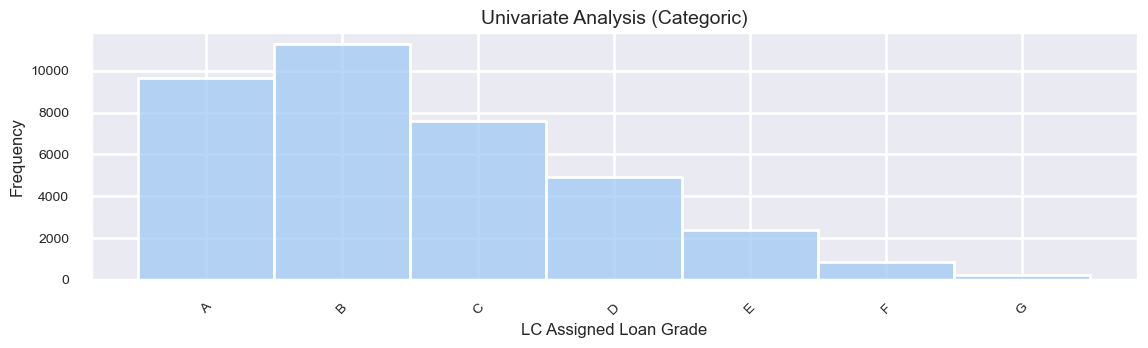

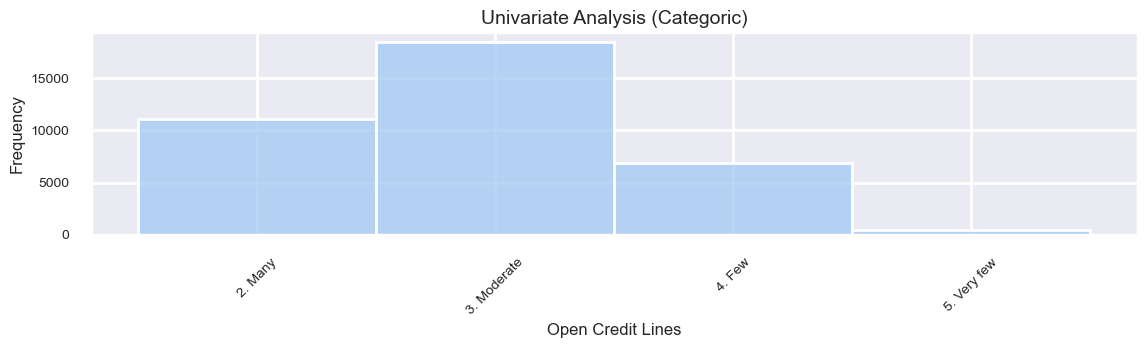

In [87]:
univariate_analysis('hist', 'Categoric', df, 'grade', 'LC Assigned Loan Grade', showKde=False)
univariate_analysis('hist', 'Categoric', df, 'd_open_acc_categories', 'Open Credit Lines', showKde=False)

<Axes: xlabel='count', ylabel='d_inquiry6m'>

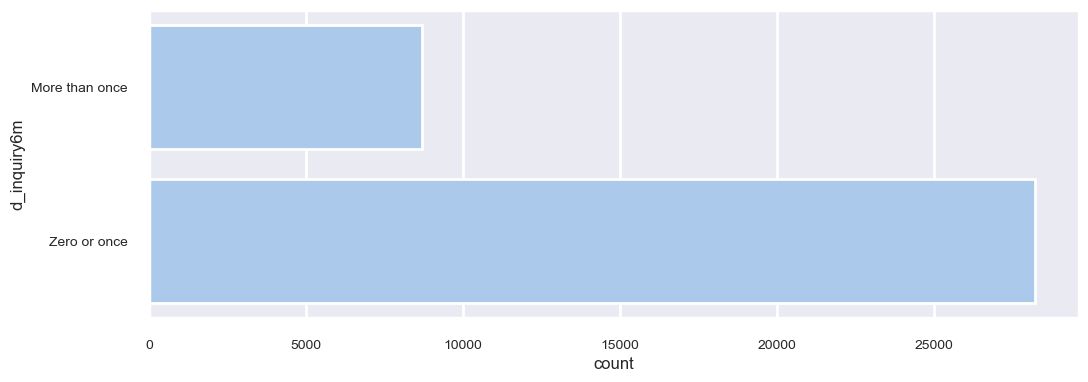

In [88]:
# sns.countplot(data=df, x='emp_length')
# sns.countplot(data=df, y='d_last_credit_pull_d_month')
sns.countplot(data=df, y='d_inquiry6m')

### **4.2. Segmented Univariate Analysis**


In [89]:
def segmented_univariate_analysis(data, x_category, y_numeric, x_label, y_label):
    sns.boxplot(data=data, x=x_category, y=y_numeric)
    plt.title(f"Segmented Univariate Analysis: {x_label} / {y_label}")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()  

- Boxplots by categorical variables


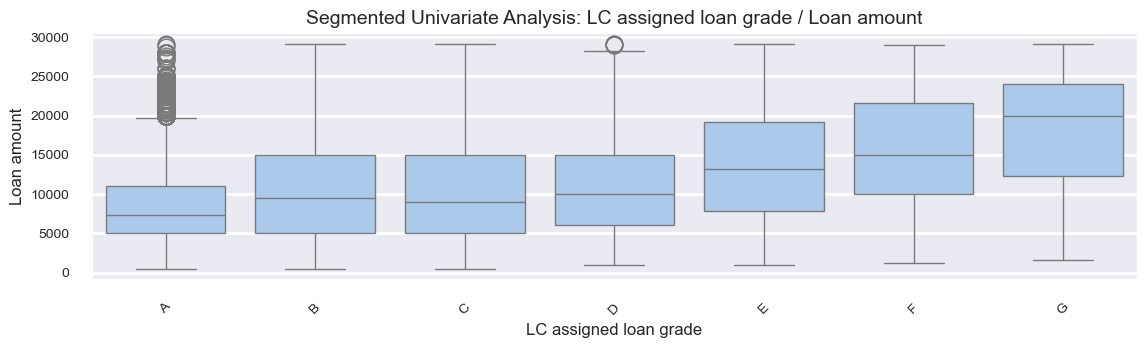

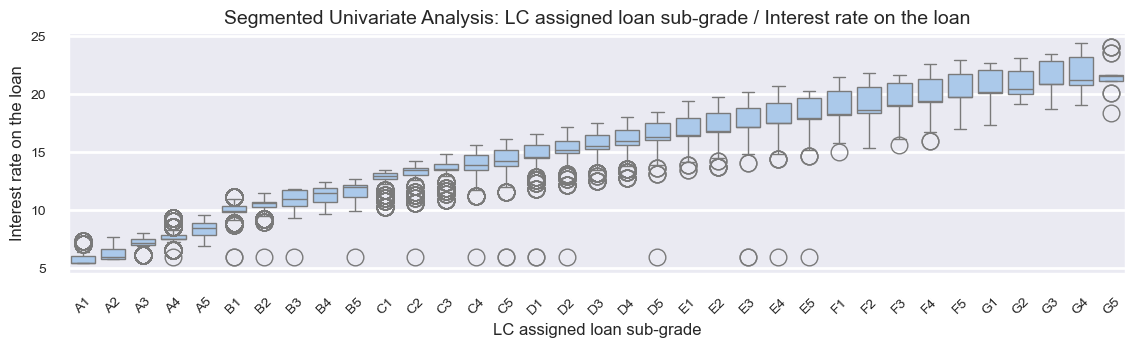

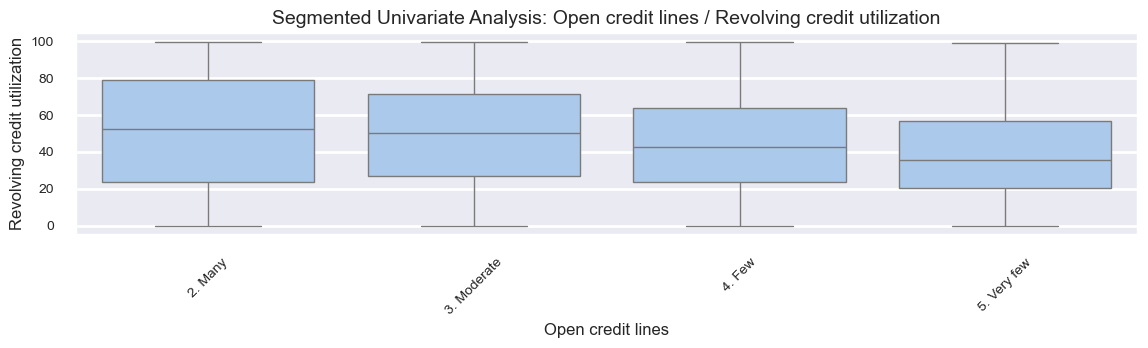

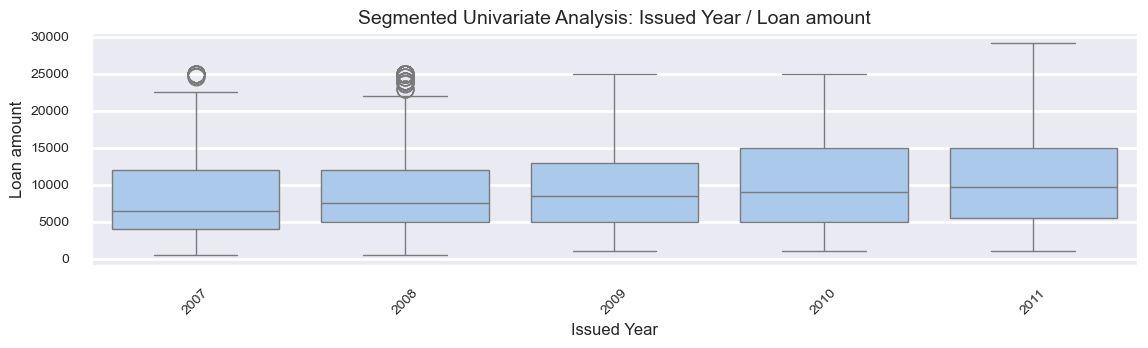

In [90]:
segmented_univariate_analysis(df, x_category='grade', y_numeric='loan_amnt', x_label='LC assigned loan grade', y_label='Loan amount')
segmented_univariate_analysis(df, x_category='sub_grade', y_numeric='int_rate', x_label='LC assigned loan sub-grade', y_label='Interest rate on the loan')
segmented_univariate_analysis(df, x_category='d_open_acc_categories', y_numeric='revol_util', x_label='Open credit lines', y_label='Revolving credit utilization')
segmented_univariate_analysis(df, x_category='d_issue_d_year', y_numeric='loan_amnt', x_label='Issued Year', y_label='Loan amount')

### **4.3. Bivariate Analysis**



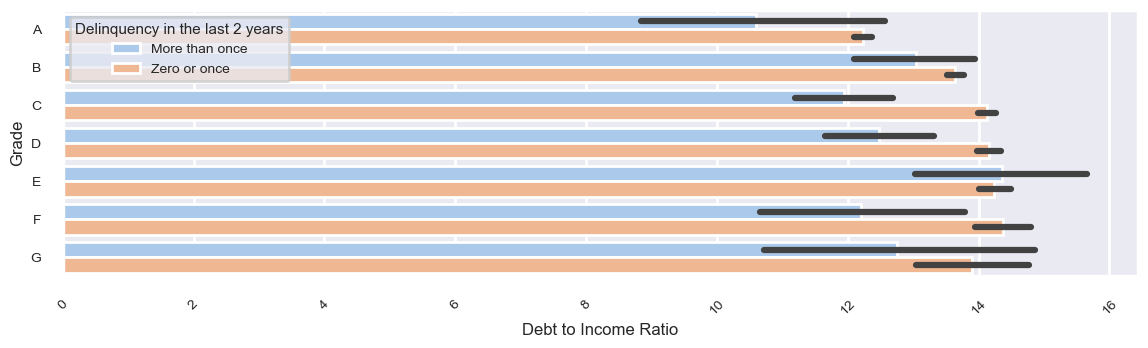

In [92]:
sns.barplot(data=df, x='dti', y='grade', hue='d_delinquency2y')
plt.legend(title='Delinquency in the last 2 years', loc='upper left', fontsize=10, title_fontsize=11)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Grade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

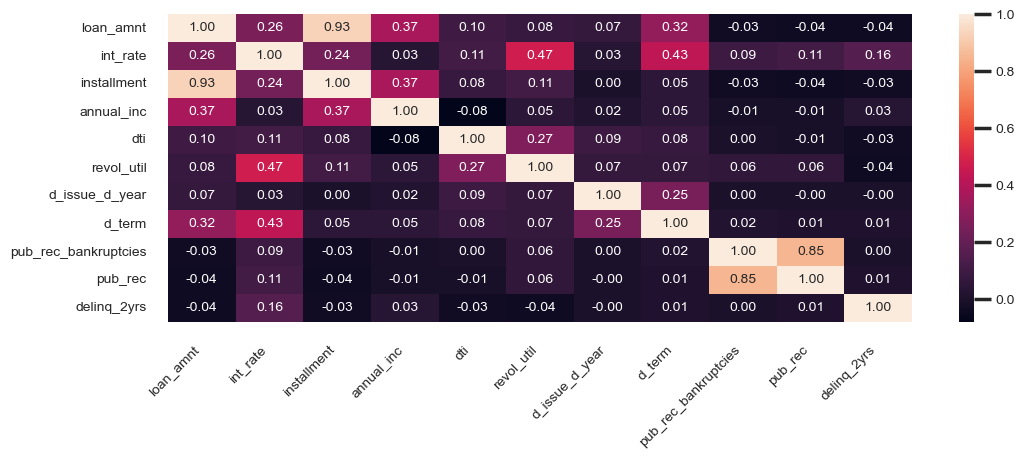

In [95]:
corr_matrix = df[['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'revol_util', 'd_issue_d_year', 'd_term', 'pub_rec_bankruptcies', 'pub_rec', 'delinq_2yrs']].corr().round(2)

sns.heatmap(data=corr_matrix, annot=True, fmt='.2f', annot_kws={'fontsize': 10})

plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10, rotation=0)

plt.show()

## **5. Summary and Results**



### **5.1. Summary**
- List the summary of insights leading to loan default



### **5.2. Recommendations**
